In [ ]:
# MSCS 634 - Project Deliverable 1
# Advanced Data Mining for Data-Driven Insights and Predictive Modeling
# Dataset: Stroke Prediction Dataset (Kaggle)

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display and style options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load Dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')



In [ ]:
# Inspect structure
print("Dataset shape:", df.shape)
df.head()

# Basic Info
df.info()
df.describe(include='all')

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Data Cleaning
# Drop 'id' column (not useful for modeling)
df.drop(columns=['id'], inplace=True)

# Handle missing values in 'bmi' (replace with median)
df['bmi'].fillna(df['bmi'].median(), inplace=True)



Dataset shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Missing values per column:
 id                     0
gender                 0
age                    0
hypertension           0
he

/tmp/ipython-input-2214330086.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate records:", duplicates)
df.drop_duplicates(inplace=True)

# Fix categorical inconsistencies (e.g., work_type typo)
df['work_type'].replace({'Govt_jov': 'Govt_job'}, inplace=True)

# Confirm cleaning
df.info()



Duplicate records: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


/tmp/ipython-input-1039141086.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_type'].replace({'Govt_jov': 'Govt_job'}, inplace=True)


/tmp/ipython-input-600535258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='pastel')


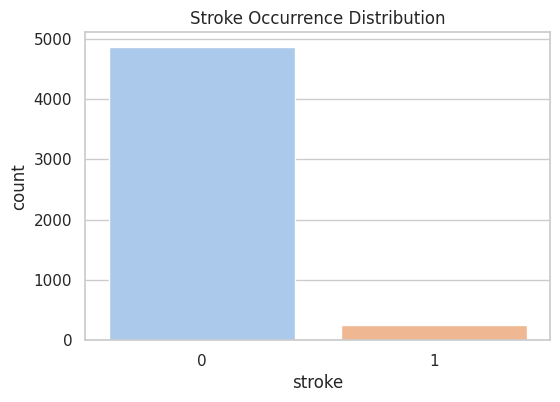

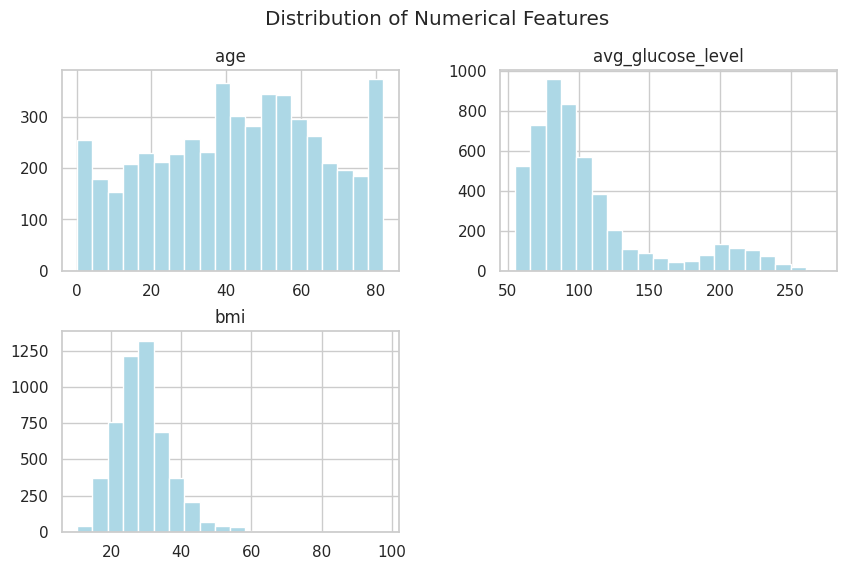

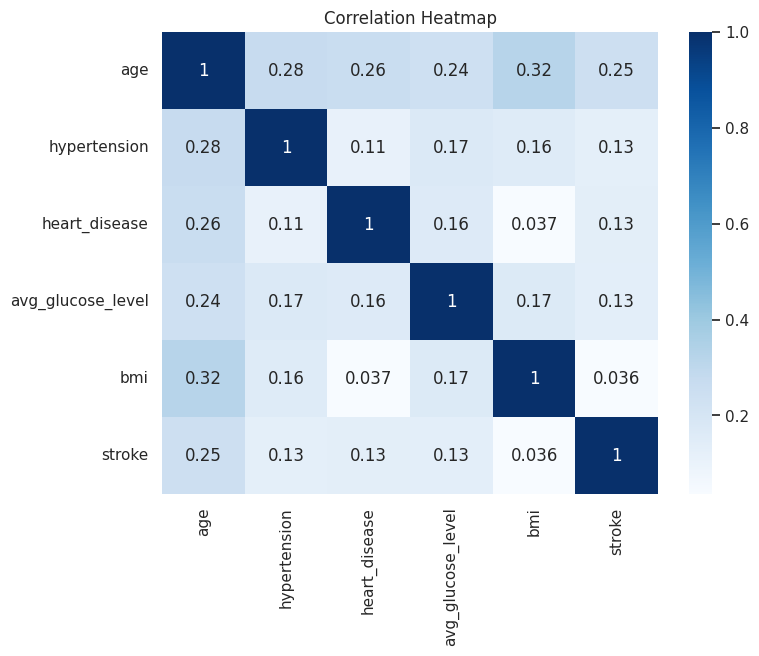

/tmp/ipython-input-600535258.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='coolwarm')


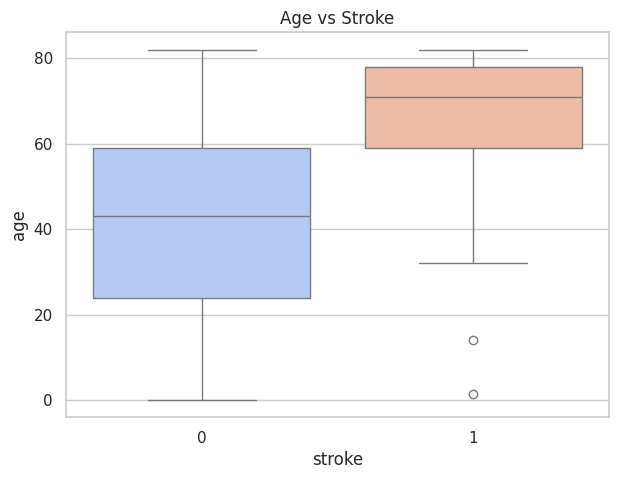

/tmp/ipython-input-600535258.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')


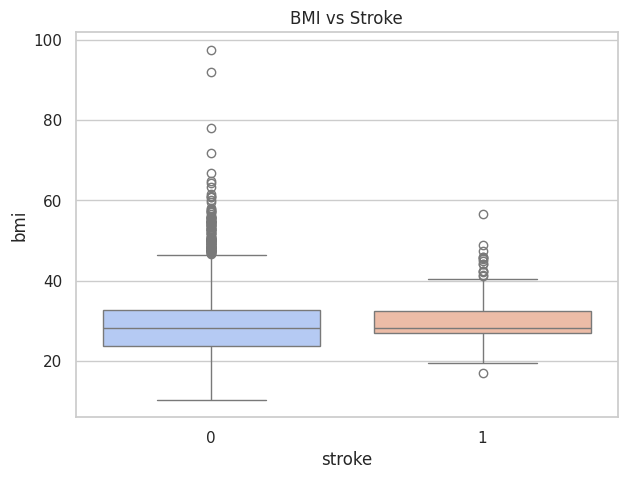

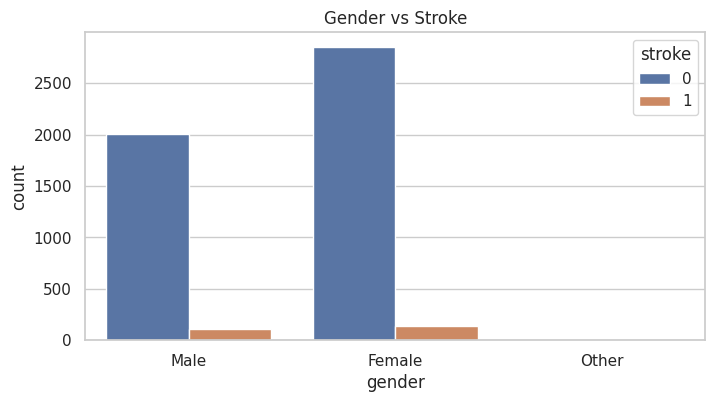

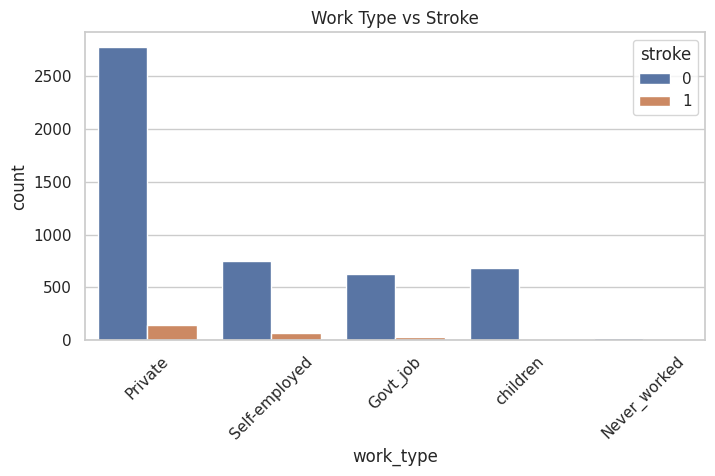

In [ ]:
# Exploratory Data Analysis (EDA)
#  Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=df, palette='pastel')
plt.title('Stroke Occurrence Distribution')
plt.show()

#  Numeric Distributions
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols].hist(bins=20, figsize=(10,6), color='lightblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#  Relationship between Age, BMI, and Stroke
plt.figure(figsize=(7,5))
sns.boxplot(x='stroke', y='age', data=df, palette='coolwarm')
plt.title('Age vs Stroke')
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title('BMI vs Stroke')
plt.show()

#  Categorical Breakdown
plt.figure(figsize=(8,4))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Gender vs Stroke')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Work Type vs Stroke')
plt.xticks(rotation=45)
plt.show()